# Численные методы

## Лабораторная работа 3

### Вариант 1

### Студент: Тимофеенко Никита

#### Задание 1.


![](2023-04-10_17-38-20.png)

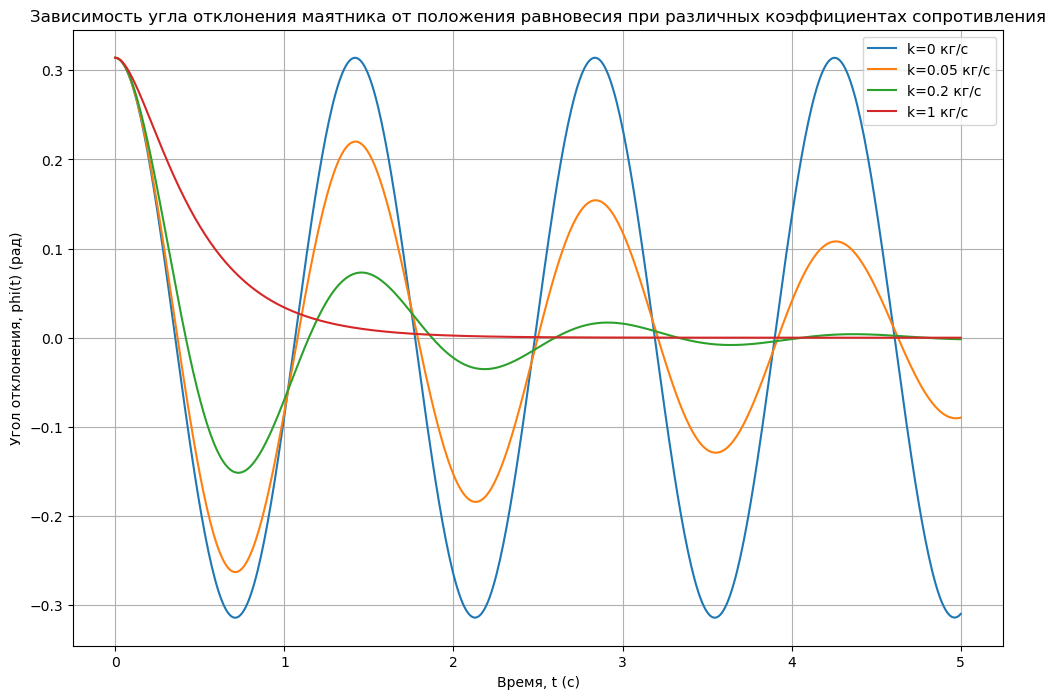

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


def pendulum_equation(t, y, k, m, L, g=9.81):
	""" Уравнение маятника """								# Так как в Python нельзя решить ДУ второго порядка на прямую,
	phi, omega = y											# ДУ 2 порядка необходимо разбить на систему 2 уравнений первого порядка для этого вводятся новые переменные
	dydt = [omega, - k / m * omega - g / L * phi]			# omega = dphi / dt, domega / dt = - k / m * omega - g / L * phi
	return dydt


# Начальные условия и параметры
phi0 = np.pi / 10
omega0 = 0
m = 0.1
L = 0.5
k_values = [0, 0.05, 0.2, 1]
tmax = 5


# Функция для численного решения уравнения движения маятника
def solve_pendulum(k, m, L, phi0, omega0, tmax):
	""" Решение уравнения маятника с заданными начальными условиями """
	sol = solve_ivp(pendulum_equation, [0, tmax], [phi0, omega0], args=(k, m, L), dense_output=True)
	return sol


# Решение уравнений движения и построение графиков
plt.figure(figsize=(12, 8))
t = np.linspace(0, tmax, 500)


for k in k_values:
	sol = solve_pendulum(k, m, L, phi0, omega0, tmax)
	phi = sol.sol(t)[0]
	plt.plot(t, phi, label=f'k={k} кг/с')


plt.xlabel('Время, t (с)')
plt.ylabel('Угол отклонения, phi(t) (рад)')
plt.title('Зависимость угла отклонения маятника от положения равновесия при различных коэффициентах сопротивления')
plt.legend()
plt.grid()
plt.show()

#### Задание 2.

![](2023-04-10_17-38-42.png)

In [5]:
import numpy as np
import pandas as pd
from scipy.integrate import solve_ivp

def pendulum_equation(t, y, k, m, L, g=9.81):
	theta, omega = y
	dydt = [omega, -(g/L) * theta - (k/m) * omega]
	return dydt

def find_period(sol, theta0):
	t_crossings = []
	for i in range(1, len(sol.t) - 1):
		if sol.y[0, i] >= theta0 and sol.y[0, i-1] < theta0 and sol.y[1, i] > 0:
			t_crossings.append(sol.t[i])
	if len(t_crossings) >= 2:
		period = t_crossings[1] - t_crossings[0]
	else:
		period = np.nan
	return period

# Начальные условия и параметры
omega0 = 0
m = 0.1
L = 0.5
k_values = [0, 0.05, 0.2, 1]
phi0_values = [5 * np.pi / 6, np.pi / 2, np.pi / 6, np.pi / 10]
tmax = 50

# Создание таблиц
table1 = pd.DataFrame(index=k_values, columns=['T'])
table2 = pd.DataFrame(index=phi0_values, columns=['T'])

# Расчет периодов для различных значений k и фиксированного начального отклонения
theta0 = np.pi / 10
for k in k_values:
	sol = solve_ivp(pendulum_equation, [0, tmax], [theta0, omega0], args=(k, m, L), rtol=1e-6, atol=1e-8)
	period = find_period(sol, theta0)
	table1.loc[k, 'T'] = period

# Расчет периодов для различных начальных отклонений и фиксированного значения k
k = 0.05
for phi0 in phi0_values:
	sol = solve_ivp(pendulum_equation, [0, tmax], [phi0, omega0], args=(k, m, L), rtol=1e-6, atol=1e-8)
	period = find_period(sol, phi0)
	table2.loc[phi0, 'T'] = period

print("Таблица 1:")
print(table1)

print("\nТаблица 2:")
print(table2)

Таблица 1:
        T
0.00  NaN
0.05  NaN
0.20  NaN
1.00  NaN

Таблица 2:
            T
2.617994  NaN
1.570796  NaN
0.523599  NaN
0.314159  NaN


#### Задание 1.

![](merge_from_ofoct.png)

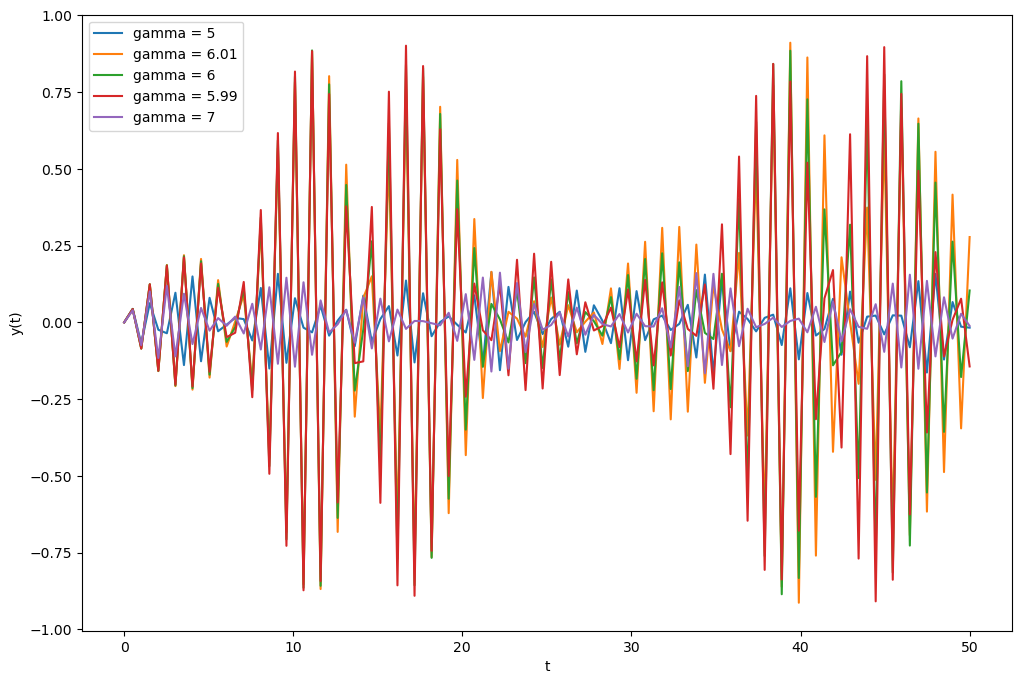

In [56]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def eq_system(x, y, w, gamma):
	""" ДУ 2 порядка """
	dydt = [y[1], - w ** 2 * np.sin(y[0]) + np.sin(gamma * x)]				# y[0] = y, y[1] = y'
	return dydt																# y[0]' = y[1], y[1]' = - w ** 2 * np.sin(y[0]) + np.sin(gamma * x)

y0 = [0, 0]
t_span = [0, 50]
t_eval = np.linspace(t_span[0], t_span[1], 100)

w = 6																		# gamma < w				w - 1 = 5
epsilon = 0.01																# gamma < w + epsilon	w + epsilon = 6.01
gamma_values = [w - 1, w + epsilon, w, w - epsilon, w + 1]					# gamma = w				w = 6
																			# gamma = w - epsilon	w - epsilon = 5.99
																			# gamma > w				w + 1 = 7

fig, ax = plt.subplots(figsize=(12, 8))
for gamma in gamma_values:
	sol = solve_ivp(eq_system, t_span, y0, args=(w, gamma), t_eval=t_eval)
	ax.plot(sol.t, sol.y[0], label=f"gamma = {gamma}")

ax.set_xlabel("t")
ax.set_ylabel("y(t)")
ax.legend()
plt.show()

#### Задание 2.

![](2023-04-10_17-58-57.png)

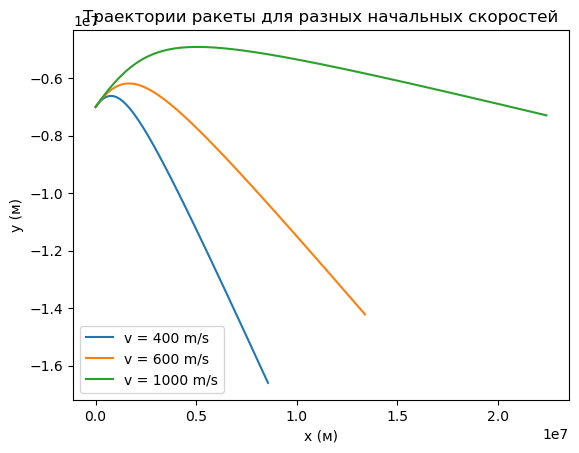

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Константы
G = 6.67430e-11
m1 = 10000
m2 = 7.3e22
x0, y0 = -4.24e-9, -7e6
v_list = [400, 600, 1000]
theta = np.pi / 4 # Угол между направлением скорости ракеты и осью x
delta_t = 20
simulation_time = 20000

# Функция для вычисления ускорения
def acceleration(x, y):
	r_squared = x**2 + y**2
	r_cubed = r_squared * np.sqrt(r_squared)
	ax = G * m2 * x / r_cubed
	ay = G * m2 * y / r_cubed
	return ax, ay

# Метод Эйлера
def euler_method(v, dt, t_end):
	num_steps = int(t_end / dt)
	x, y, vx, vy = np.zeros(num_steps), np.zeros(num_steps), np.zeros(num_steps), np.zeros(num_steps)
	x[0], y[0] = x0, y0
	vx[0], vy[0] = v * np.cos(theta), v * np.sin(theta)

	for i in range(1, num_steps):
		ax, ay = acceleration(x[i-1], y[i-1])
		x[i] = x[i-1] + vx[i-1] * dt
		y[i] = y[i-1] + vy[i-1] * dt
		vx[i] = vx[i-1] + ax * dt
		vy[i] = vy[i-1] + ay * dt

	return x, y

# Решение для каждой начальной скорости и построение траекторий
plt.figure()
for v in v_list:
	x, y = euler_method(v, delta_t, simulation_time)
	plt.plot(x, y, label=f"v = {v} m/s")

plt.xlabel("x (м)")
plt.ylabel("y (м)")
plt.title("Траектории ракеты для разных начальных скоростей")
plt.legend()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Константы
G = 6.67430e-11
m1 = 10000
m2 = 7.3e22
x0, y0 = -4.24e-9, -7e6
v_list = [400, 600, 1000]
theta = np.pi / 4 # Угол между направлением скорости ракеты и осью x
delta_t = 20
simulation_time = 20000


def dist():
	return (x0 ** 2 - y0 ** 2) ** 0.5

def F():
	k = G * m1 * m2 / (dist() ** 3)
	return - k * x0, - k * y0

for i in range(0, 1000):
	f = F()

	x0 = x0 + v_list[0]

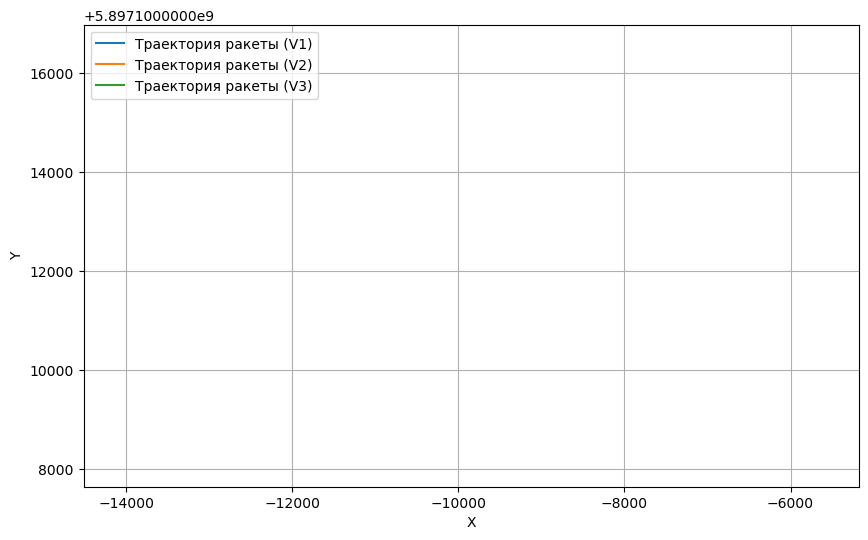

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def compute_trajectory(VR, dt):
	Re = 1e6
	Rm = 1.7e6
	R0 = 1e6
	Te = 27.32 * 24 * 3600
	Ms = 1.989e30
	Me = 5.972e24
	Mm = 7.3e22
	G = 6.67430e-11
	alfa = np.pi / 4

	re = np.array([0, -Re])
	rm = np.array([0, -Rm])
	r = np.array([0, -Re - 2 * R0])
	Ve = np.array([2 * np.pi * Re / Te, 0])
	Vm = np.array([2 * np.pi * Rm / Te, 0])
	V = np.array([-VR * np.cos(alfa), -VR * np.sin(alfa)]) + Ve

	Tcalc = 3 * 30 * 24.3 * 3600
	X = []
	Y = []

	t = 0
	while t <= Tcalc:
		ae = -G * Ms * re / (np.linalg.norm(re))**3
		am = -G * Ms * rm / (np.linalg.norm(rm))**3
		a = (-G * Ms * r / (np.linalg.norm(r))**3 +
		 	G * Me * (re - r) / (np.linalg.norm(re - r))**3 +
		 	G * Mm * (rm - r) / (np.linalg.norm(rm - r))**3)
		Ve += ae * dt
		Vm += am * dt
		V += a * dt
		re += Ve * dt
		r += V * dt
		X.append(r[0])
		Y.append(r[1])
		if np.linalg.norm(r) > Rm:
			break
		t += dt

	return X, Y

dt = 20

V1 = 400
V2 = 600
V3 = 1000

X1, Y1 = compute_trajectory(V1, dt)
X2, Y2 = compute_trajectory(V2, dt)
X3, Y3 = compute_trajectory(V3, dt)

plt.figure(figsize=(10, 6))
plt.plot(X1, Y1, label='Траектория ракеты (V1)')
plt.plot(X2, Y2, label='Траектория ракеты (V2)')
plt.plot(X3, Y3, label='Траектория ракеты (V3)')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.show()

In [18]:
a = 10 ** 7
p = 7 * 10 ** 7

print((a ** 2 - p ** 2) ** 0.5)

(4.242300954899627e-09+69282032.30275509j)
